In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

### import sheet

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('train.csv', header=0)

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### deal with data, work out the number of survival in total, and observation

In [5]:
# delete useless imformation
df = df.drop(['PassengerId','Ticket','Cabin'], axis = 1)
df 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.7+ KB


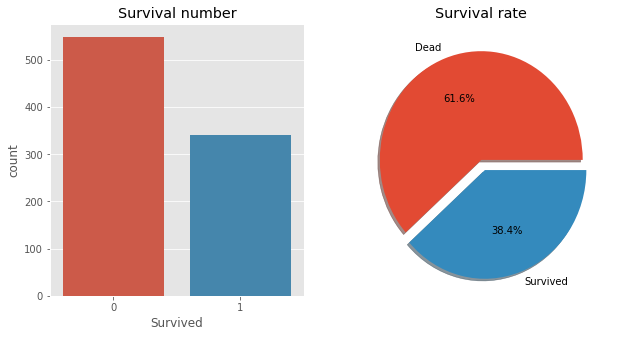

In [7]:
plt.style.use('ggplot')

total_survived_num = df['Survived'].sum()
total_dead_num = 891 - total_survived_num

plt.figure(figsize = (10,5))

plt.subplot(121)
plt.style.use('ggplot')    
sns.countplot(x='Survived',data=df)
plt.title('Survival number')

plt.subplot(122)            
expl = [0,0.1]      
plt.pie([total_dead_num, total_survived_num], explode=expl,labels=['Dead','Survived'],autopct='%1.1f%%', shadow=True)
plt.title('Survival rate') 

plt.show()

from the total number and rate of survivors,we can figure out that nearly three fifths of people died. 

### 1 variable

the bar charts with one variables will be familiar to most people and intuitively clear

What can be learned about the chances of survival from a passenger's age, sex or class?

In [8]:
df['AgeRange'] = pd.cut(df['Age'], [0, 16, 65, 80], labels=['Child', 'Adult', 'Elderly'])
# divide passengers in three age groups, including child, adult and elderly
survived_age = df.groupby('AgeRange')['Survived'].mean()
survived_sex = df.groupby('Sex')['Survived'].mean()
survived_class = df.groupby('Pclass')['Survived'].mean()

(0.0, 1.0)

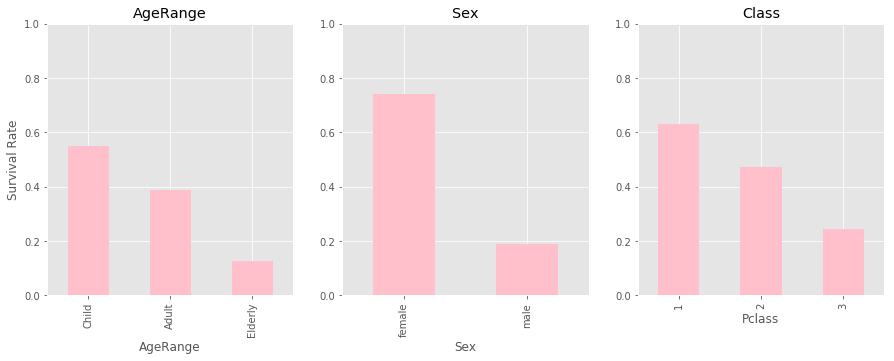

In [9]:
fig, (axis1,axis2,axis3) = plt.subplots(1, 3, figsize=(15,5))
ax = survived_age.plot.bar(ax=axis1, color='pink', title='AgeRange')
ax.set_ylabel('Survival Rate')
ax.set_ylim(0.0,1.0)
ax = survived_sex.plot.bar(ax=axis2, color='pink', title='Sex')
ax.set_ylim(0.0,1.0)
ax = survived_class.plot.bar(ax=axis3, color='pink', title='Class')
ax.set_ylim(0.0,1.0)

from the first bar chart,we can see that childern are more likely to survive due to the fact that they are taken the most care in emergency.The survival rate of old people is the lowest which is less than 20%.
  The second graph shows that the survival rate of female servivors is four times as that of male,because women had more chance to get onto the lifeboat.
  The third one revealed that the passengers who stayed on first class tend to survive,cause the first class is more close to deck and easier for people to rescue.

Was it advantageous for survival to have been traveling with family members on the Titanic?

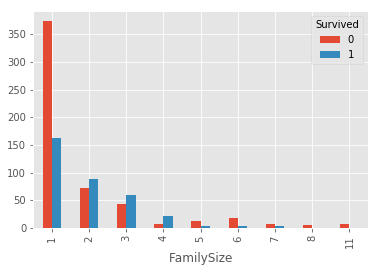

In [10]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
pd.crosstab(df['FamilySize'],df['Survived']).plot(kind='bar')
plt.show()

people who traveled alone or accompanied with more than five family members are more likely to survive.

Does the class will also affect the rate of survivors?

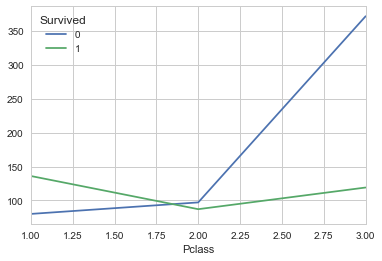

In [18]:
pd.crosstab(df['Pclass'],df['Survived']).plot(kind='line')
plt.show()

the passengers who stayed on third class have a high death rate ,cause the third class is located in the lower level.

### 2 variables

when combine two elements, it is more readable

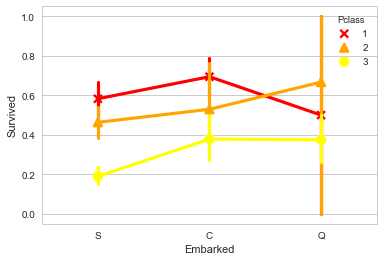

In [12]:
sns.set(style='whitegrid')  
sns.pointplot(x='Embarked', y='Survived', hue='Pclass', data=df,
              palette={1: 'red', 2: 'orange', 3: 'yellow'},
              markers=['x','^','o'], linestyles=['-','-','-']);

the passengers who stayed on first class tend to survive,cause the first class is more close to deck and easier for people to rescue.
However,the survival rate is unrelated to embarked.

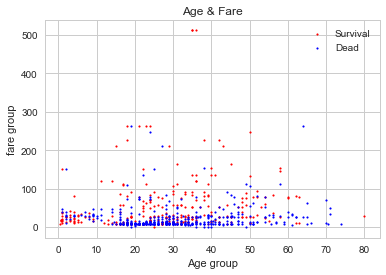

In [13]:
fig, ax = plt.subplots()

ax.set_xlabel('Age group')
ax.set_ylabel('fare group')
plt.title('Age & Fare') 

xlive = df.Age[df.Survived==1]
xdie = df.Age[df.Survived==0]
ylive = df.Fare[df.Survived==1]
ydie = df.Fare[df.Survived==0]

m = ax.scatter(xlive, ylive, 3, 'red')
ax.hold
n = ax.scatter(xdie, ydie, 3, 'blue')
ax.hold
ax.legend([m,n],['Survival','Dead'])

plt.show()

the impact of age is smaller than the impact of fare.Whose fare is higher is more likely to survive.This is mainly because they will have a better class.

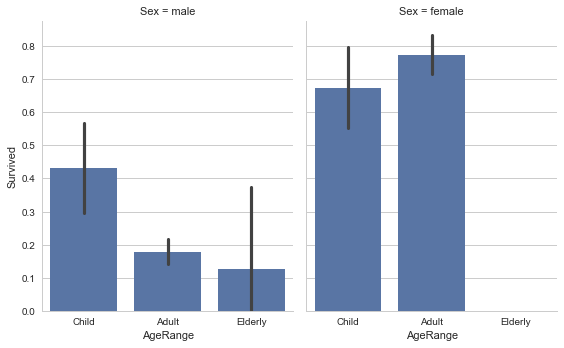

In [28]:
g = sns.FacetGrid(df,col='Sex', size=5, aspect=.8)
g.map(sns.barplot, 'AgeRange', 'Survived',);

both sex and agerange will affect the survival rate. what need to be mentioned is the male adult have a lower survival rate combined with female adult. this is because male adult are responsible to save more passengers.

Can anything be learned  from the names of the passengers that is relevant for understanding survival?

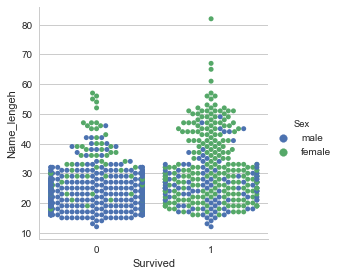

In [30]:
df['Name_lengeh']=df.Name.apply(len)
sns.factorplot(x='Survived', y='Name_lengeh', hue='Sex', data=df, kind='swarm')
plt.show()

the rate of survival is unrelated to the name length.

### conclution

from the above graphs,we can conclude that the pessangers who is weakest members are more likely to survive,such as child and female who will be look after by others. Meanwhile people who stayed in higher class get more chance to survival.
also,there are some elements is unrelated to the survival rate, including name length,embarked and cabin.